In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# Lista de plugins disponibles (no necesariamente instalados):
io.find_available_plugins()
# Lista de plugins instalados para cada funci´on:
io.plugin_order()

{'imread': ['imageio', 'matplotlib'],
 'imsave': ['imageio'],
 'imshow': ['matplotlib'],
 'imread_collection': ['imageio', 'matplotlib'],
 'imshow_collection': ['matplotlib'],
 '_app_show': ['matplotlib']}

# 1. Entrada, salida y representación de imágenes

## Ejercicio 1.1.- Leer y visualizar imágenes

a) Lea la imagen `lena.png` (Figura 1); llamémosle lena1. Escriba por pantalla su
tamaño (shape), sus valores mínimo y máximo, y su tipo. Visualice la imagen.

Shape: (512, 512, 3)
Valor minimo: 3
Valor máximo: 255
Tipo: uint8


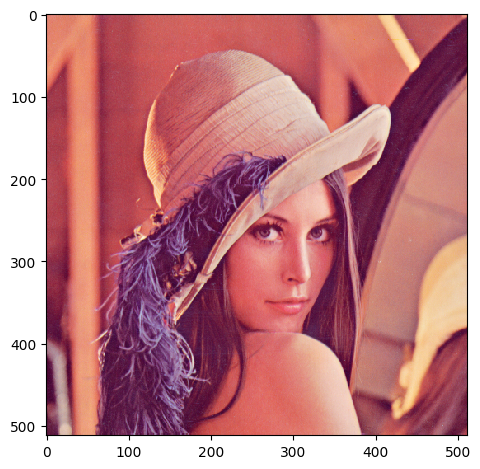

In [5]:
lena1= io.imread('lena.png')
print('Shape:', lena1.shape)
print('Valor minimo:', np.min(lena1))
print('Valor máximo:', np.max(lena1))
print('Tipo:', lena1.dtype)
io.imshow(lena1)

b) Lea la imagen `lena.png`, usando el parámetro `as gray=True`; llamémosle
lena2. Escriba por pantalla su tamaño, sus valores mínimo y máximo, y su
tipo. Visualice la imagen, consiguiendo que se vea en escala de grises.

Shape: (512, 512)
Valor minimo: 0.07254666666666666
Valor máximo: 0.9654356862745097
Tipo float64


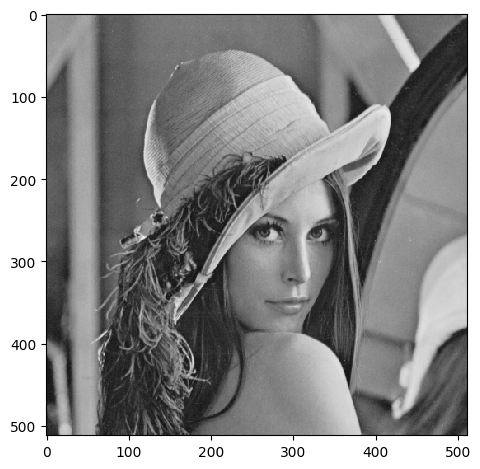

In [6]:
lena2 = io.imread('lena.png', as_gray=True)
print('Shape:', lena2.shape)
print('Valor minimo:', np.min(lena2))
print('Valor máximo:', np.max(lena2))
print('Tipo', lena2.dtype)
io.imshow(lena2)

c) Divida el valor de la imagen lena2 por 2 y súmele 0,25; llamémosle lena3
al resultado. Escriba por pantalla sus valores mínimo y máximo. Visualice en
subfiguras anexas lena2 y lena3, usando escala de grises, y consiguiendo que
las diferencias de brillo sean apreciables visualmente.

Valor minimo 0.2862733333333333
Valor máximo 0.7327178431372549


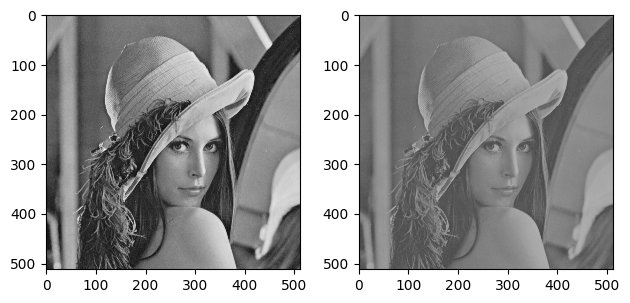

In [7]:
lena3 = lena2/2 +0.25
fig, ax = plt.subplots(1,2)
print('Valor minimo', np.min(lena3))
print('Valor máximo', np.max(lena3))
io.imshow(lena2, ax=ax[0])
io.imshow(lena3, ax=ax[1])

## Ejercicio 1.2.- Escribir imágenes en disco

a) Guarde las imágenes lena2 y lena3 del Ejercicio 1.1, en los ficheros lena2.png
y lena3.png, respectivamente, de la carpeta resultados. Asegúrese de que
la diferencia de intesidades es apreciable en las imágenes guardadas (con un
visor externo, o volviendolas a leer).

In [8]:
io.imsave("resultados/lena2.png", lena2)
io.imsave("resultados/lena3.png", lena3)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Valor minimo 0.2862733333333333
Valor máximo 0.7327178431372549


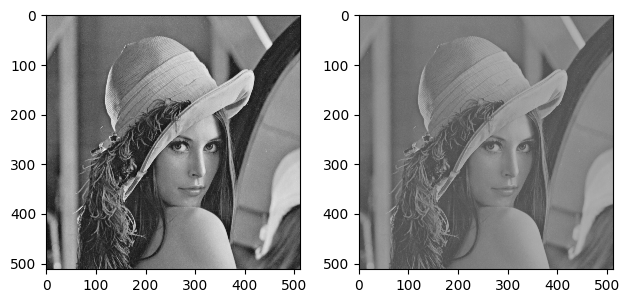

In [9]:
lena2_t = io.imread('resultados/lena2.png', as_gray=True)
lena3_t = io.imread('resultados/lena3.png', as_gray=True)
fig, ax = plt.subplots(1,2)
print('Valor minimo', np.min(lena3))
print('Valor máximo', np.max(lena3))
io.imshow(lena2_t, ax=ax[0])
io.imshow(lena3_t, ax=ax[1])

b) Repita la operación anterior, pero multiplicando antes las imágenes por 10,
y almacenando los resultados en lena2b.png y lena3b.png, respectivamente.
¿Qué ocurre y por qué? ¿Cómo debemos hacer para que las diferencias en las
imágenes se puedan almacenar?

In [10]:
from skimage import exposure
lena2b=exposure.rescale_intensity(lena2*10, in_range=(0,10), out_range=(0,1))
lena3b=exposure.rescale_intensity(lena3*10, in_range=(0,10), out_range=(0,1))
io.imsave("resultados/lena2b.png", lena2b)
io.imsave("resultados/lena3b.png", lena3b)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


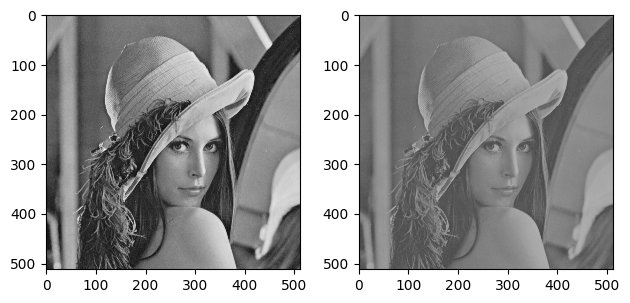

In [11]:
fig, ax = plt.subplots(1,2)
io.imshow(lena2b, ax=ax[0])
io.imshow(lena3b, ax=ax[1])

## Ejercicio 1.3.- Enteros, Flotantes y Booleanos

Usando la siguiente función, que crea imágenes de degradado en escala de grises, con
un tamaño, tipo y rango dados:

```
import numpy as np
def intensity_gradient(size=(100, 100), dtype=np.uint8,
    values=(0, 255)):
    rows, cols = size
    mn, mx = values
    result = np.linspace(mn, mx, rows*cols).reshape(rows, cols)
    return result.astype(dtype)   
```

In [12]:
import numpy as np
def intensity_gradient(size=(100, 100), dtype=np.uint8,
    values=(0, 255)):
    rows, cols = size
    mn, mx = values
    result = np.linspace(mn, mx, rows*cols).reshape(rows, cols)
    return result.astype(dtype)

a) Cree tres imágenes de degradado, de tamaño 100 × 100, y:

    * A: tipo np.float64, y valores de 0.1 a 0.9.

    * B: tipo np.uint8, y valores de 25 a 230.
    
    * C: tipo np.int32, y valores de -230 a 230

In [13]:
A = intensity_gradient(dtype= np.float64, values=(0.1, 0.9))
B = intensity_gradient(dtype= np.uint8, values=(25,230))
C = intensity_gradient(dtype= np.int32, values=(-230,230))

b) Visualice las tres imágenes, en escala de grises y sin normalizar, y reporte su
valor mínimo y máximo.

Imagen A
Valor mínimo: 0.1
Valor máximo: 0.9
Imagen B
Valor mínimo: 25
Valor máximo: 230
Imagen C
Valor mínimo: -230
Valor máximo: 230


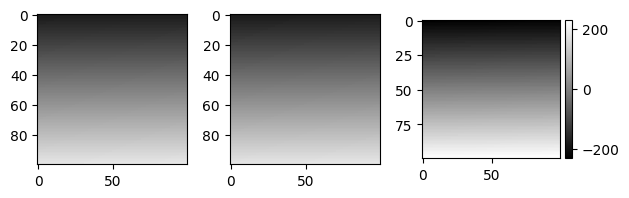

In [14]:
images = [A,B,C] 
images_name=['A', 'B', 'C']
fig, ax = plt.subplots(1,3)
for i in range(len(images)): 
    print(f'Imagen {images_name[i]}')
    print(f'Valor mínimo: {np.min(images[i])}')
    print(f'Valor máximo: {np.max(images[i])}')
    io.imshow(images[i], ax=ax[i], cmap='gray')


c) Explore el resultado de las funciones img_as_float, img_as_unit8, img_as_int
e img_as_bool de skimage sobre las tres imágenes anteriores, así como la salida
de la función skimage.dtype limits aplicada sobre las imágenes de entrada
y salida. Explique lo que ocurre.

In [15]:
import skimage 
def show_results(images, names): 
    fig, ax = plt.subplots(1, len(images))
    for i in range(len(images)): 
        print(f'Imagen {images_name[i]}')
        print(f'dtype_limites:{skimage.util.dtype_limits(images[i])}')
        print(f'Valor mínimo: {np.min(images[i])}')
        print(f'Valor máximo: {np.max(images[i])}')
        io.imshow(images[i], ax=ax[i], cmap='gray')

IMAGENES ORIGINALES
Imagen A
dtype_limites:(-1, 1)
Valor mínimo: 0.1
Valor máximo: 0.9
Imagen B
dtype_limites:(0, 255)
Valor mínimo: 25
Valor máximo: 230
Imagen C
dtype_limites:(-2147483648, 2147483647)
Valor mínimo: -230
Valor máximo: 230


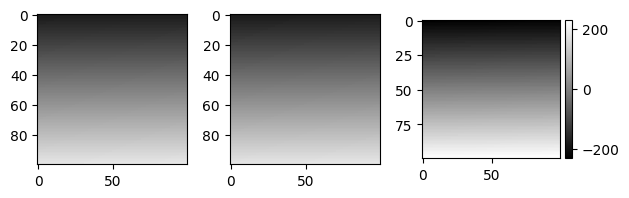

In [16]:
print('IMAGENES ORIGINALES')
show_results(images, images_name)

IMAGENES usando img_as_float
Imagen A
dtype_limites:(-1, 1)
Valor mínimo: 0.1
Valor máximo: 0.9
Imagen B
dtype_limites:(-1, 1)
Valor mínimo: 0.09803921568627451
Valor máximo: 0.9019607843137255
Imagen C
dtype_limites:(-1, 1)
Valor mínimo: -1.0710209613065333e-07
Valor máximo: 1.0710209613065333e-07


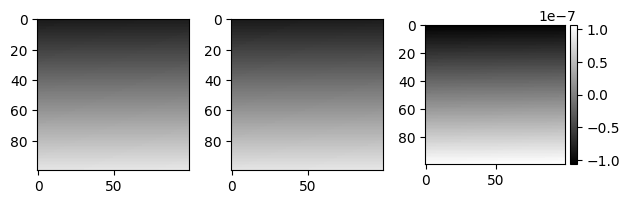

In [17]:
print('IMAGENES usando img_as_float')
show_results( [skimage.util.img_as_float(img) for img in images], images_name)

IMAGENES usando img_as_uint
Imagen A
dtype_limites:(0, 65535)
Valor mínimo: 6554
Valor máximo: 58982


c:\Users\yeudi\Documents\GitHub\PIVA_2023-2\P1\piva\lib\site-packages\skimage\util\dtype.py:501: UserWarning: Downcasting int32 to uint16 without scaling because max value 230 fits in uint16
  return _convert(image, np.uint16, force_copy)


Imagen B
dtype_limites:(0, 65535)
Valor mínimo: 6425
Valor máximo: 59110
Imagen C
dtype_limites:(0, 65535)
Valor mínimo: 0
Valor máximo: 230


c:\Users\yeudi\Documents\GitHub\PIVA_2023-2\P1\piva\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


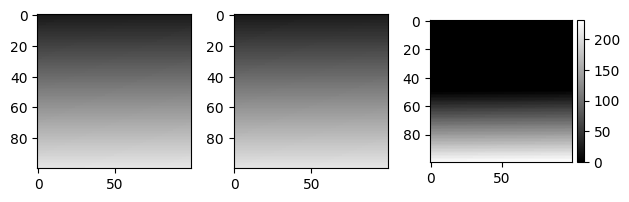

In [18]:
print('IMAGENES usando img_as_uint')
show_results( [skimage.util.img_as_uint(img) for img in images], images_name)

IMAGENES usando img_as_int
Imagen A
dtype_limites:(-32768, 32767)
Valor mínimo: 3276
Valor máximo: 29490
Imagen B
dtype_limites:(-32768, 32767)
Valor mínimo: 3212
Valor máximo: 29555
Imagen C
dtype_limites:(-32768, 32767)
Valor mínimo: -230
Valor máximo: 230


c:\Users\yeudi\Documents\GitHub\PIVA_2023-2\P1\piva\lib\site-packages\skimage\util\dtype.py:526: UserWarning: Downcasting int32 to int16 without scaling because max value 230 fits in int16
  return _convert(image, np.int16, force_copy)


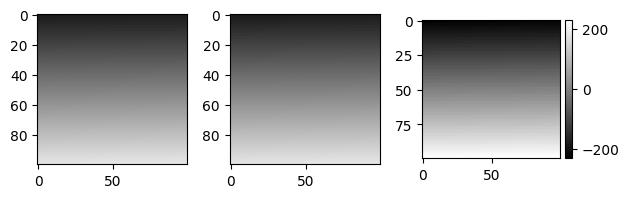

In [19]:
print('IMAGENES usando img_as_int')
show_results( [skimage.util.img_as_int(img) for img in images], images_name)

IMAGENES usando img_as_bool
Imagen A
dtype_limites:(False, True)
Valor mínimo: False
Valor máximo: True
Imagen B
dtype_limites:(False, True)
Valor mínimo: False
Valor máximo: True
Imagen C
dtype_limites:(False, True)
Valor mínimo: False
Valor máximo: False


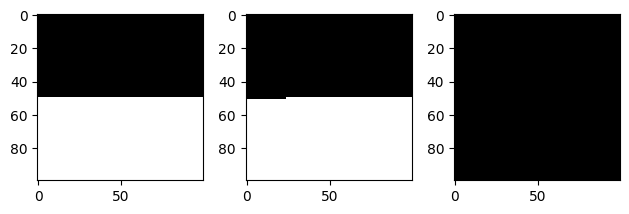

In [20]:
print('IMAGENES usando img_as_bool')
show_results( [skimage.util.img_as_bool(img) for img in images], images_name)

## Ejercicio 1.4.- Indexación

Considerando las imágenes data.brick() y data.astronaut(), convertidas a
números flotantes en un rango apropiado:

In [21]:
brick = skimage.data.brick()
astronaut = skimage.data.astronaut()
brick = skimage.util.img_as_float(brick)
astronaut = skimage.util.img_as_float(astronaut)

a) Sobre una copia de brick, asigne un valor de intensidad ”blanco puro”, a la
ventana definida por las filas 100 a 150, y las columnas 20 a 120. Visualice el
resultado, su valor máximo, su valor mínimo y el tipo.

Valor máximo: 1.0
Valor mínimo: 0.24705882352941178
Tipo: float64


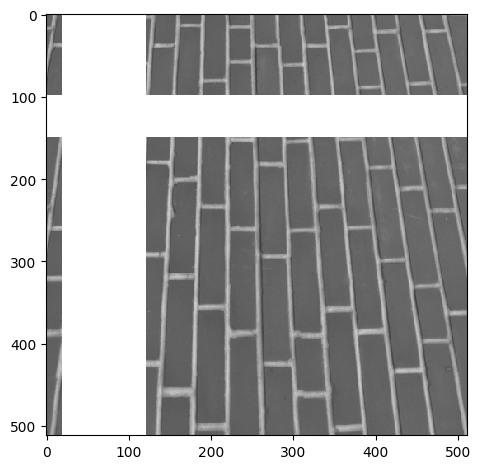

In [22]:
brick_white = brick.copy()
brick_white[range(100, 151),:] =1 
brick_white[:, range(20, 121)] =1
print('Valor máximo:', np.max(brick_white))
print('Valor mínimo:', np.min(brick_white))
print('Tipo:', brick_white.dtype)
io.imshow(brick_white)


b)  Cree una máscara binaria (llamémosle brickmsk) que valga 1 en las posiciones
donde **brick** sea mayor que el 50 % del rango dinámico y 0 en el resto. Visualice
el resultado, así como su valor máximo, su valor mínimo y el tipo.

In [23]:
vmin = np.min(brick)
vmax = np.max(brick)
dr = vmax-vmin
brickmsk = brick.copy()
brickmsk[brickmsk> vmin +0.5*dr] =1
brickmsk[brickmsk<= vmin + 0.5*dr] =0

Valor máximo: 1.0
Valor mínimo: 0.0
Tipo: float64


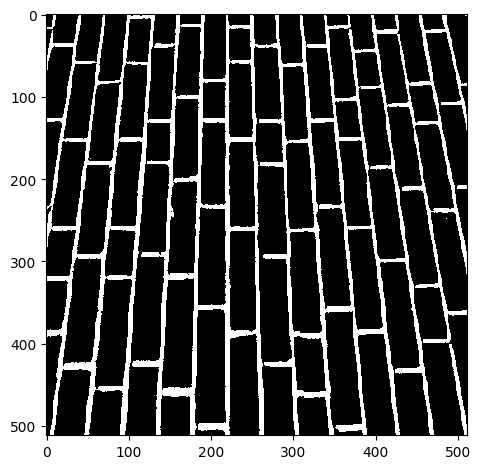

In [24]:
print('Valor máximo:', np.max(brickmsk))
print('Valor mínimo:', np.min(brickmsk))
print('Tipo:', brickmsk.dtype)
io.imshow(brickmsk)
#brickmsk

c) Modifique los valores de una copia de astronaut para tomen un valor [r,g,b]
aleatorio en las posiciones indicadas por la máscara brickmsk

In [25]:
astro_random = astronaut.copy()
n,m = brickmsk.shape 
for i in range(n): 
    for j in range(m): 
        if brickmsk[i][j]: 
            astro_random[i][j] = np.random.uniform(low=0, high=1, size=3)

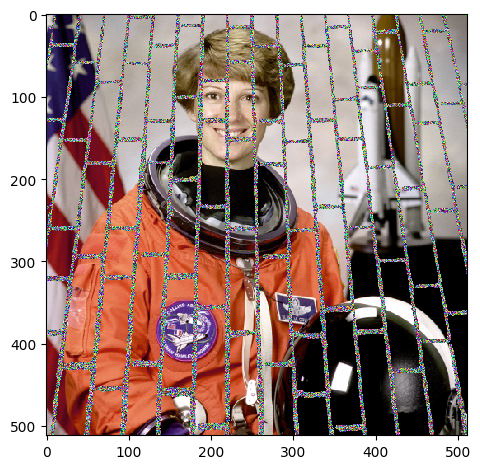

In [26]:
io.imshow(astro_random)

d) Usando una copia de astronaut, visualice, en cuatro subfiguras, cada uno de
sus canales RGB, en escala de grises, junto con la imagen en color

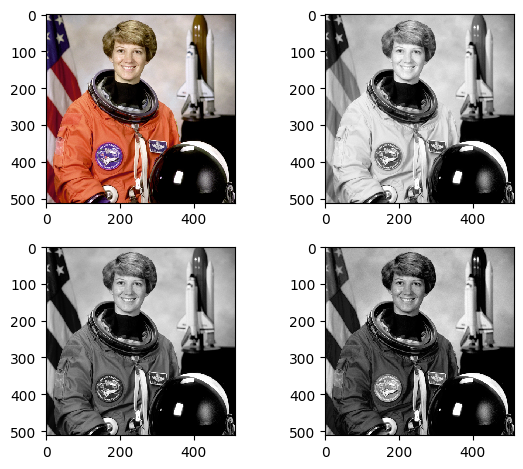

In [27]:
astronaut2 = astronaut.copy()
fig, ax = plt.subplots(2,2)
io.imshow(astronaut2, ax=ax[0][0])
io.imshow(astronaut2[:,:,0], ax=ax[0][1])
io.imshow(astronaut2[:,:,1], ax=ax[1][0])
io.imshow(astronaut2[:,:,2], ax=ax[1][1])

e) Usando la función skimage.draw.disk, obtenga las coordenadas de un círculo
en una posición aleatoria del espacio 512×512, y radio 20. Modifique la imagen
resultante del apartado (c) para que los valores del canal verde en las posiciones
del c´ırculo sean 100 % del rango din´amico, dejando el resto de valores sin
cambiar. Visualize el resultado.

In [28]:
from skimage.draw import disk
vmax_gg = np.max(astro_random)
center = np.random.randint(0, 512, 2)
astro_random2 = astro_random.copy()

rr, cc = disk(center=center, radius=20, shape=astro_random2.shape)
astro_random2[ rr, cc, 1]= vmax_gg

Valor máximo: 1.0
Valor mínimo: 0.0
Tipo: float64


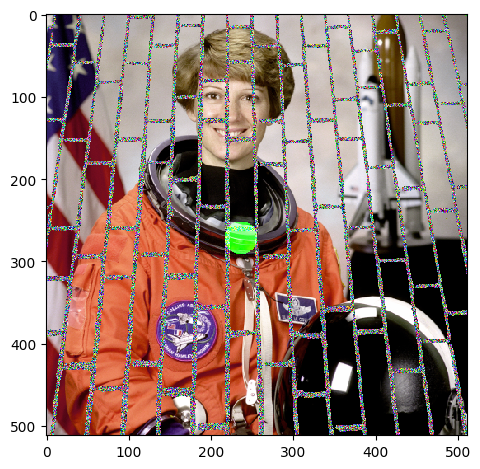

In [29]:
print('Valor máximo:', np.max(astro_random2))
print('Valor mínimo:', np.min(astro_random2))
print('Tipo:', astro_random2.dtype)
io.imshow(astro_random2)


# 2. Transformación del espacio de color

El módulo skimage.color proporciona funciones para la tranformación del espacio de
color, como pueden ser: rgb2gray, rgb2lab, rgb2hsv, entre otros.

## Ejercicio 2.1.- Espacios de color

Supongamos que queremos segmentar la vasculatura de la imagen data.retina(),
y segmentar la mariposa de la imagen butterfly.jpg. Considerando cada una de
estas imágenes:

a) Muestre en una cuadrícula de 3 × 3 de subfiguras: los tres canales de RGB en
escala de grises, los tres canales de CITE-L\*a\*b* en escala de grises, y los tres
canales de HSV en escala de grises. Use los t´ıtulos de las figuras para indicar
el nombre del canal y su rango de valores.

In [30]:
from skimage.color import rgb2lab
from skimage.color import rgb2hsv
def show_grid3x3(img): 
    RGB_img = img.copy()
    HSV_img = rgb2lab(RGB_img)
    CITELab_img = rgb2hsv(RGB_img)
    fig, ax = plt.subplots(3,3)
    imgs = [RGB_img, CITELab_img, HSV_img]
    for i in range(len(imgs)):
        img = imgs[i] 
        io.imshow(img[:,:,0], ax=ax[i][0], cmap='Greys')
        io.imshow(img[:,:,1], ax=ax[i][1], cmap='Greys')
        io.imshow(img[:,:,2], ax=ax[i][2], cmap='Greys')
    

c:\Users\yeudi\Documents\GitHub\PIVA_2023-2\P1\piva\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


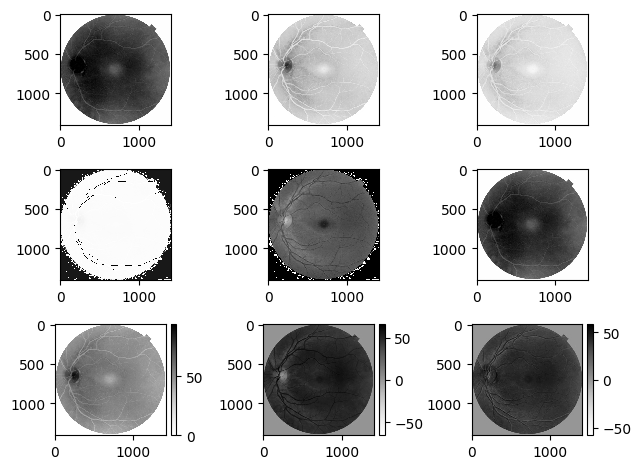

In [31]:
retina = skimage.data.retina()
show_grid3x3(retina)

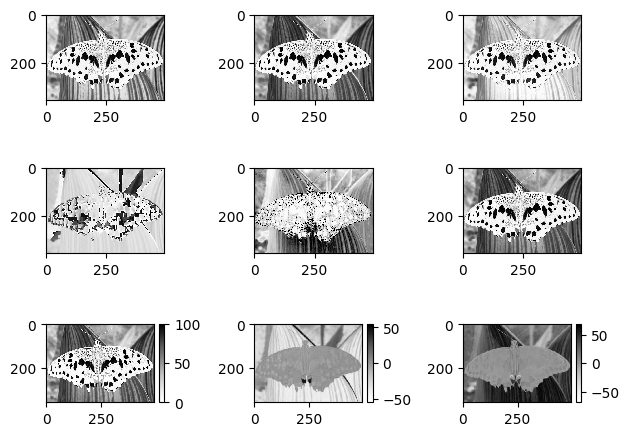

In [32]:
butterfly= io.imread('butterfly.jpg')
show_grid3x3(butterfly)

b) Observando los resultados: ¿Qué canal es más apropiado para la segmentación
objetivo? Razone la respuesta. 

Para segmentar el HSV es la mejor porque distingue mejor los componentes de cada imagen. 




## Ejercicio 2.2.- Canal de color arbitrario



a) Haga una función **rand_channel** que, tomando como entrada una imagen de
tres canales, obtenga como salida una imagen de un solo canal que resulta de
la combinación lineal aleatoria de los tres canales.
Es decir, si la imagen de entrada I es una matriz N × M × 3, y W es un vector
de 3 pesos aleatorios tal que $\sum Wi = 1$, lo que buscamos es la matriz de salida
O, de N × M elementos, que resulta de hacer producto escalar entre I y W a
lo largo de la tercera dimensión de I (e.g. con np.dot o np.matmul).

In [91]:
def rand_channel(img): 
    coef = np.random.uniform(0, 1, size=(3,1))
    coef = coef/np.sum(coef)
    img_c =np.dot(img, coef)
    #print(img_c.shape) 
    return img_c

def showKxMrandom(img, k, m): 
     fig, ax = plt.subplots(k, m, figsize=(4*k, m))
     for i in range(k): 
         for j in range(m): 
            img_t = img.copy()
            img_t = rand_channel(img_t)
            io.imshow(img_t, ax = ax[i][j], cmap='Greys')

c:\Users\yeudi\Documents\GitHub\PIVA_2023-2\P1\piva\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


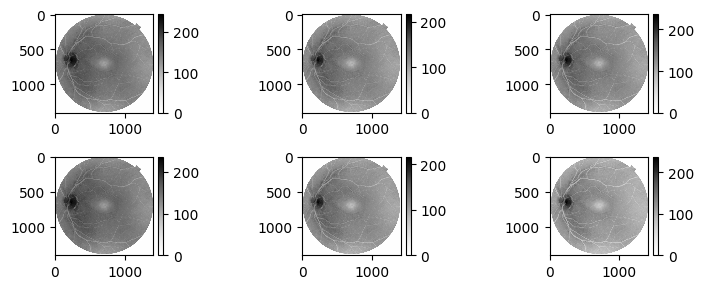

In [93]:
retina = skimage.data.retina()
showKxMrandom(retina, 2,3)

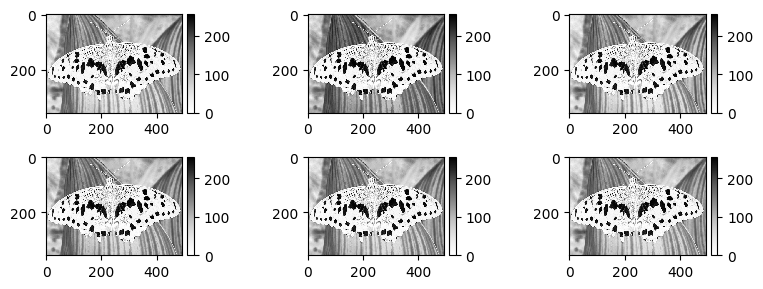

In [92]:
butterfly= io.imread('butterfly.jpg')
#print(butterfly.shape)
#io.imshow(butterfly)
showKxMrandom(butterfly, 2,3)

# 3. Histogramas y ajustes de luminosidad y contraste

En ```Scikit-image``` disponemos del módulo ```skimage.exposure19```, que proporciona funciones
para el ajuste de intensidad y contraste de imagen.
La representación del histograma de una imagen es de especial relevancia para analizar la
distribución de valores de la misma. Existen diversas utilidades en las librerías utilizadas
que nos permitirán obtener dicha representación, como pueden ser: exposure.histogram20,
```np.histogram21, ndi.histogram22```, etc. o ```plt.hist23``` para visualización.

## Ejercicio 3.1.- Ajuste de contraste global

Considerando las imagenes data.text() y data.page(), represéntelas en escala de
gris junto con su histograma. Compare los resultados de las siguientes técnicas de
ajuste de contraste global. Visualice los resultados, junto con sus histogramas.

(array([[ 1.,  3.,  1., ..., 63.,  0.,  0.],
        [ 1.,  1.,  3., ..., 48.,  0.,  0.],
        [ 0.,  3.,  1., ..., 61.,  0.,  0.],
        ...,
        [ 0.,  0.,  2., ..., 55.,  0.,  0.],
        [ 0.,  0.,  2., ..., 61.,  0.,  0.],
        [ 0.,  0.,  3., ..., 58.,  0.,  0.]]),
 array([ 10. ,  28.7,  47.4,  66.1,  84.8, 103.5, 122.2, 140.9, 159.6,
        178.3, 197. ]),
 <a list of 448 BarContainer objects>)

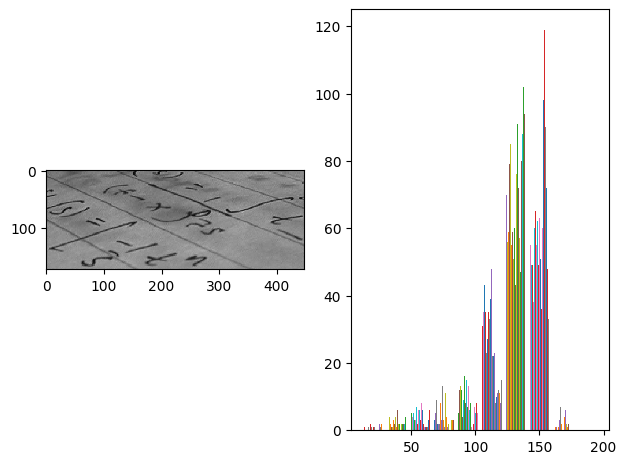

In [124]:
text = skimage.data.text()
fig, ax = plt.subplots(1, 2)
io.imshow(text, ax=ax[0])
ax[1].hist(text)         

(array([[  0.,   3.,  18., ...,   0.,   0.,   0.],
        [  0.,   1.,  14., ...,   0.,   0.,   0.],
        [  0.,   4.,  11., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,  10., 181.],
        [  0.,   0.,   0., ...,   0.,  10., 181.],
        [  0.,   0.,   0., ...,   0.,  10., 181.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 384 BarContainer objects>)

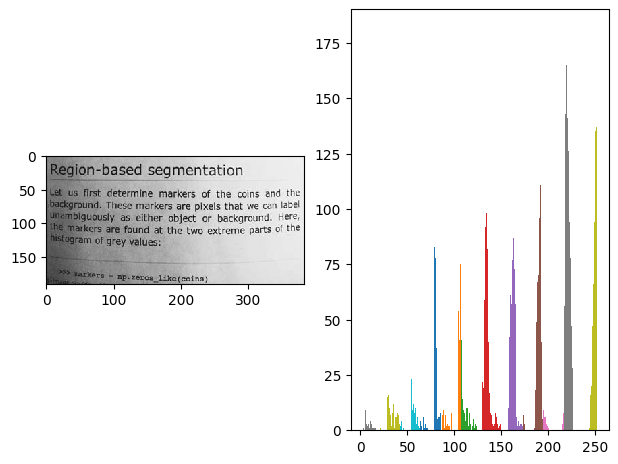

In [125]:
page = skimage.data.page()
fig, ax = plt.subplots(1, 2)
io.imshow(page, ax=ax[0])
ax[1].hist(page)  

a) **Modificación lineal del rango dinámico.** Usando la función `rescale intensity`, y expandiendo el histograma para que ocupe todo
el rango dinámico disponible.

(array([[ 1.,  3.,  1., ..., 54.,  0.,  0.],
        [ 1.,  1.,  3., ..., 44.,  0.,  0.],
        [ 0.,  3.,  1., ..., 53.,  0.,  0.],
        ...,
        [ 0.,  0.,  2., ..., 47.,  0.,  0.],
        [ 0.,  0.,  2., ..., 50.,  0.,  0.],
        [ 0.,  0.,  3., ..., 49.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 448 BarContainer objects>)

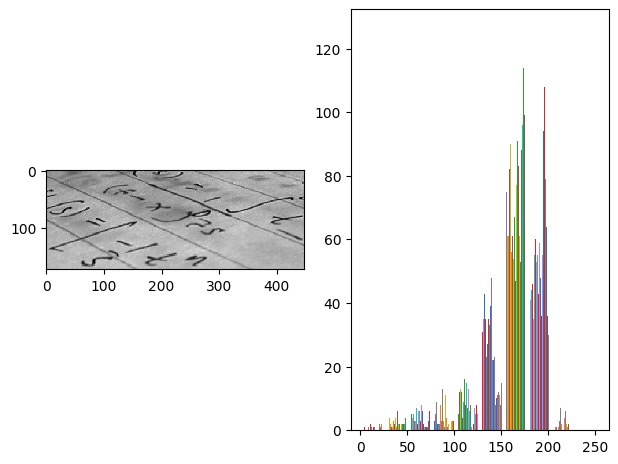

In [126]:
text_c = skimage.exposure.rescale_intensity(text, in_range='image', out_range='dtype')
fig, ax = plt.subplots(1, 2)
io.imshow(text_c, ax=ax[0])
ax[1].hist(text_c)  

(array([[  0.,   3.,  18., ...,   0.,   0.,   0.],
        [  0.,   1.,  14., ...,   0.,   0.,   0.],
        [  0.,   4.,  11., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,  10., 181.],
        [  0.,   0.,   0., ...,   0.,  10., 181.],
        [  0.,   0.,   0., ...,   0.,  10., 181.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 384 BarContainer objects>)

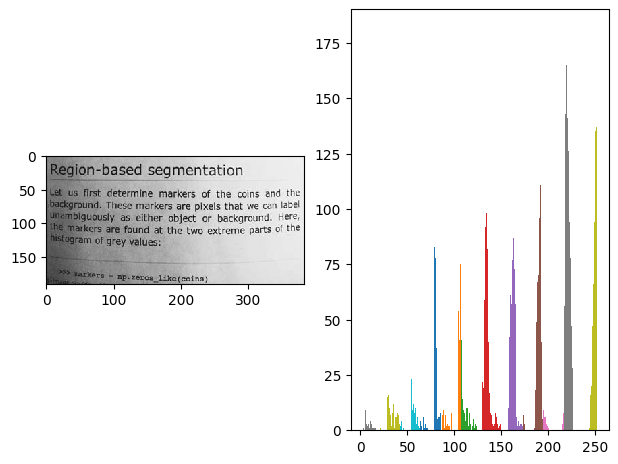

In [127]:
page_c = skimage.exposure.rescale_intensity(page, in_range='image', out_range='dtype')
fig, ax = plt.subplots(1, 2)
io.imshow(page_c, ax=ax[0])
ax[1].hist(page_c)  

b) **Window level contrast enhancement.** Usando la función rescale intensity, y seleccionando un rango de entrada a mano que permita maximizar el contraste entre texto y fondo.


(array([[ 1.,  2.,  2., ..., 28., 42., 83.],
        [ 1.,  0.,  3., ..., 24., 48., 83.],
        [ 0.,  2.,  2., ..., 21., 53., 80.],
        ...,
        [ 0.,  0.,  1., ..., 14., 53., 95.],
        [ 0.,  0.,  0., ..., 13., 62., 86.],
        [ 0.,  0.,  0., ..., 15., 55., 93.]]),
 array([ 17. ,  40.8,  64.6,  88.4, 112.2, 136. , 159.8, 183.6, 207.4,
        231.2, 255. ]),
 <a list of 448 BarContainer objects>)

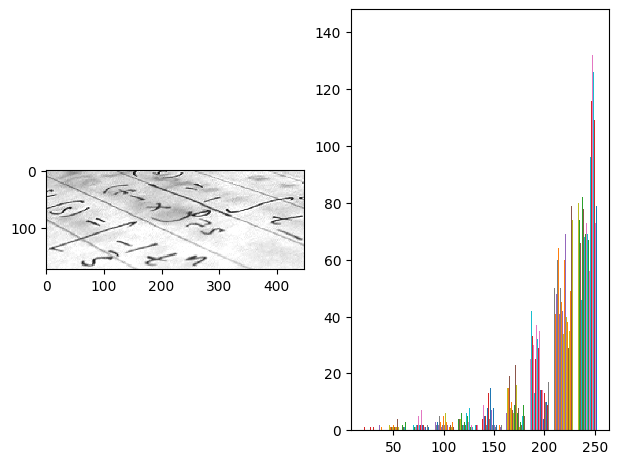

In [123]:
text_c = skimage.exposure.rescale_intensity(text, in_range=(0, 150), out_range='dtype')
fig, ax = plt.subplots(1, 2)
io.imshow(text_c, ax=ax[0])
ax[1].hist(text_c)  

(array([[ 13.,   9.,  63., ...,   0.,   0.,   0.],
        [  7.,  16.,  61., ...,   0.,   0.,   0.],
        [  9.,  11.,  60., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 191.],
        [  0.,   0.,   0., ...,   0.,   0., 191.],
        [  0.,   0.,   0., ...,   0.,   0., 191.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 384 BarContainer objects>)

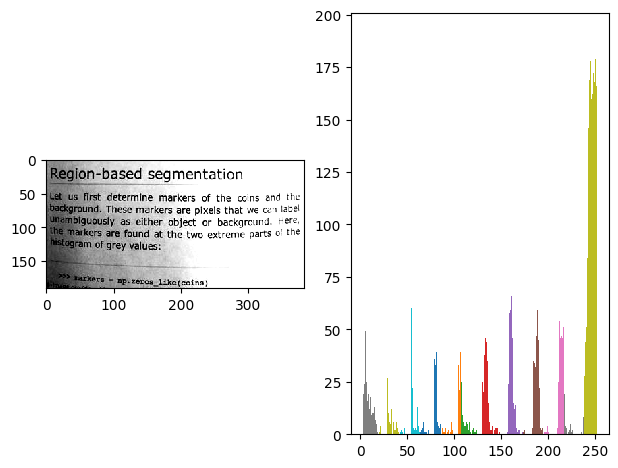

In [122]:
page_c = skimage.exposure.rescale_intensity(page, in_range=(50, 200), out_range='dtype')
fig, ax = plt.subplots(1, 2)
io.imshow(page_c, ax=ax[0])
ax[1].hist(page_c) 

c) **Ajuste Gamma.** Usando la función adjust gamma, y seleccionando un valor
de gamma apropiado que maximice el contraste entre texto y fondo.

(array([[  0.,   0.,   1., ...,  40., 119.,   1.],
        [  0.,   0.,   1., ...,  29., 129.,   0.],
        [  0.,   0.,   0., ...,  34., 127.,   0.],
        ...,
        [  0.,   0.,   0., ...,  17., 147.,   1.],
        [  0.,   0.,   0., ...,  18., 146.,   0.],
        [  0.,   0.,   0., ...,  22., 145.,   0.]]),
 array([133. , 143.9, 154.8, 165.7, 176.6, 187.5, 198.4, 209.3, 220.2,
        231.1, 242. ]),
 <a list of 448 BarContainer objects>)

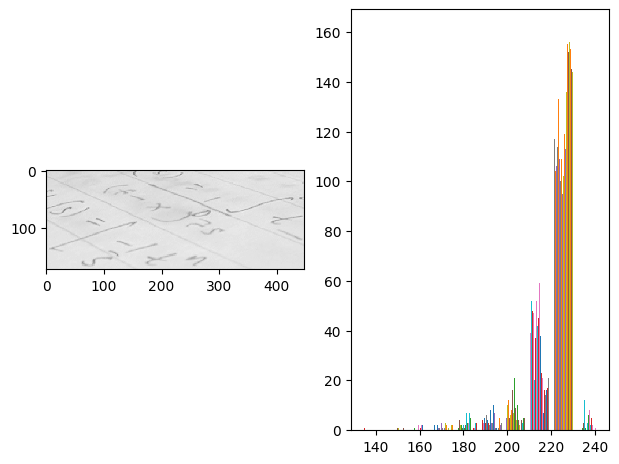

In [119]:
text_c = skimage.exposure.adjust_gamma(text, gamma= 0.2)
fig, ax = plt.subplots(1, 2)
io.imshow(text_c, ax=ax[0])
ax[1].hist(text_c)  

(array([[  0.,   0.,   0., ...,  28.,   0.,   0.],
        [  0.,   0.,   0., ...,  32.,   0.,   0.],
        [  0.,   0.,   0., ...,  32.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 191.],
        [  0.,   0.,   0., ...,   0.,   0., 191.],
        [  0.,   0.,   0., ...,   0.,   0., 191.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 384 BarContainer objects>)

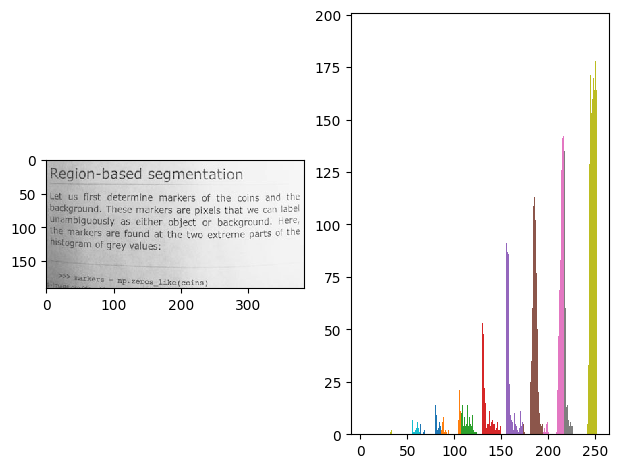

In [129]:
page_c = skimage.exposure.adjust_gamma(page, gamma= 0.5)
fig, ax = plt.subplots(1, 2)
io.imshow(page_c, ax=ax[0])
ax[1].hist(page_c)  

Discuta los beneficios o inconvenientes de cada una de las técnicas.